In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path 
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from imblearn.over_sampling import ADASYN
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score
%matplotlib inline
plt.style.use('ggplot')
pd.set_option('display.max_columns', 200) # So we can see all columns
pd.set_option('display.max_rows',200)
import utility_functions

In [2]:
df = pd.read_csv("D:/Banque Misr Internship/Loan Datasets/imputed_dataset.csv")

In [3]:
import importlib
importlib.reload(utility_functions)

<module 'utility_functions' from 'd:\\Banque Misr Internship\\loan-defaulter-prediction\\Final Notebooks\\utility_functions.py'>

Setup the model

In [4]:
X_train_res,X_val,y_train_res,y_val,X_test,y_test = utility_functions.setup_model(df)

Create & Train Decision Tree model

In [7]:
# Decision Tree Model
tree_model = DecisionTreeClassifier(random_state=42)
tree_model.fit(X_train_res, y_train_res)

y_train_pred_tree = tree_model.predict(X_train_res)
# Calculate accuracy on the training set
train_accuracy = accuracy_score(y_train_res, y_train_pred_tree)
f1_acc = f1_score(y_train_res, y_train_pred_tree)
print(train_accuracy,f1_acc)

1.0 1.0


Predict the validation set target

In [ ]:
y_pred_tree = tree_model.predict(X_val)


Calculate metrics to evaluate performance

In [ ]:
utility_functions.calculate_metrics(y_val,y_pred_tree)

Accuracy: 0.9088
F1 Score: 0.9078
ROC-AUC Score: 0.9089
Precision: 0.901846
Recall:  0.913811


Plot Confusion matrix

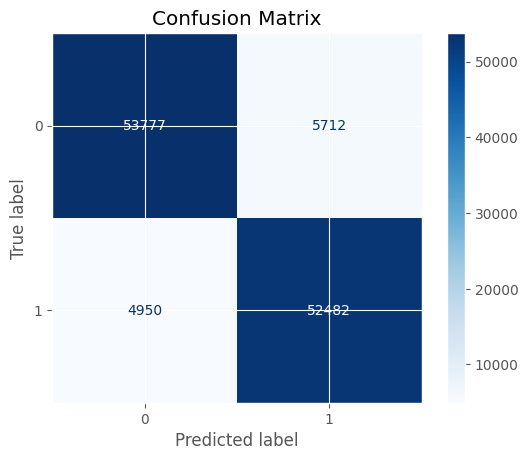

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_val, y_pred_tree)

# Plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=tree_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()